
To get back your results
If you have already run all the Notebook but stop it (doesn't appear in the running panel), you have to regenerate links like this :
* open the Notebook
* execute cells in this order :
 1. 0.1 Import libraries to 0.5 Variables settings

 2. 2.0 Settings

 3. Jump to 5.6.1 Load Mapping file

 4. 5.6.3 The alpha plots link

 5. 5.9.1 Generate 3 links : the unweighted unifrac plots, the weighted unifrac plots and the bray-curtis plots

* click on the generate links above

# Initialisation


## Import libraries

In [1]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import subprocess
import re
import shutil
from natsort import natsorted
from fnmatch import fnmatch
import flatdict
from IPython.display import display, Markdown
import pandas as pd
from Bio import SeqIO
from Bio import Seq

### Set new  PATH and matplotlibrc file

In [2]:
os.environ['PATH'] = "{0:s}:/opt/anaconda3/bin:/opt/anaconda3/envs/python2/bin".format(os.environ['PATH']) 

In [3]:
# DISPLAY Settings need for make_rarefaction_plots
fileOfMatplibrc = os.path.join(os.getcwd(),"matplotlibrc")
if not os.path.exists(fileOfMatplibrc):
    with open(fileOfMatplibrc,"w") as fh:
        fh.write("backend      : Cairo\n")
    fh.close()

## Set binaries

In [4]:
rm = '/bin/rm'
gzip = '/bin/gzip'
trimmomaticPE = '/opt/anaconda3/bin/trimmomatic PE'
bunzip2 = '/bin/bunzip2'
pear = '/opt/anaconda3/bin/pear'
sed = '/bin/sed'
cat = '/bin/cat'
grep = '/bin/grep'
sed = '/bin/sed'
vsearch = '/opt/anaconda3/bin/vsearch'
snake = '/opt/anaconda3/envs/python2/bin/python2.7'
split_libraries_fastq = '/opt/anaconda3/envs/python2/bin/split_libraries_fastq.py'
assign_taxo = '/opt/anaconda3/envs/python2/bin/assign_taxonomy.py'
make_otu_table = '/opt/anaconda3/envs/python2/bin/make_otu_table.py'
biom_convert = '/opt/anaconda3/envs/python2/bin/biom'

## Set directories and files

### Set global references and taxonomy databases

In [5]:
dGlobalDataBases = os.path.abspath("/vol/databases")
dGlobalDataReferences = os.path.join(dGlobalDataBases,"collections/references")
dGlobalDataTaxonomy = os.path.join(dGlobalDataBases,"collections/taxonomy")
dGlobalDataSilvaQiime = os.path.join(dGlobalDataBases,"collections/SILVA_128_QIIME_release")
dGlobalDataSilva132 = os.path.join(dGlobalDataBases,"collections/SILVA_132_QIIME_release")

### Set local directories and files

In [6]:
if os.path.basename(os.getcwd()) == 'Notebooks':
    dDataExt = os.path.abspath("../data/ext/")
    dDataInt = os.path.abspath("../data/int/")
    dDataLog = os.path.join(dDataInt,"log")
    dDataOut = os.path.abspath("../data/out/")
    dDataRun = os.path.abspath("../data/run/")
    dDataTmp = os.path.abspath("../data/tmp/")
    dBinExt = os.path.abspath("../bin/ext/")

In [7]:
if not os.path.exists(dDataExt):
    os.makedirs(dDataExt)    
if not os.path.exists(dDataRun):
    os.makedirs(dDataRun)
if not os.path.exists(dDataInt):
    os.makedirs(dDataInt)
if not os.path.exists(dDataLog):
    os.makedirs(dDataLog)    
if not os.path.exists(dDataOut):
    os.makedirs(dDataOut)
if not os.path.exists(dDataTmp):
    os.makedirs(dDataTmp) 

### Variable settings

In [8]:
nameOfBatch = "16S"

In [9]:
R1 = "R1"
R2 = "R2"
phred_quality_threshold = "19"

In [10]:
dirOfAssembly = os.path.join(dDataInt,"assembly_{pqt:s}".format(pqt=phred_quality_threshold))
dirOfBatch = os.path.join(dirOfAssembly,nameOfBatch)
if not os.path.exists(dirOfAssembly):
    os.makedirs(dirOfAssembly)
if not os.path.exists(dirOfBatch):
    os.makedirs(dirOfBatch) 

**NB : READS (fastq.gz files) must be in the [Project Name]/data/ext/raw/[name of the BATCH]/ dir**

In [11]:
extOfFastqFiles = "*.fastq"
extOfFastqGZFiles = "*.fastq.gz"
dirOfFastqFiles = os.path.join(dDataTmp,"fastq.d")
dirOfPairedFiles = os.path.join(dDataTmp,"paired.d")
dirOfPearFiles = os.path.join(dirOfBatch,"pear.d")
dirOfSplitLibFiles = os.path.join(dirOfBatch,"split_lib.d")
fileOfPearOutputDFXls = os.path.join(dDataOut,"{0:s}-PearOutputDataFrame.xls".format(nameOfBatch))
fileOfPearDescribeDFXls = os.path.join(dDataOut,"{0:s}-PearDescribeDataFrame.xls".format(nameOfBatch))
fileOfSplitLibOutputDFXls = os.path.join(dDataOut,"{0:s}-SplitLibOutputDataFrame.xls".format(nameOfBatch))
fileOfSplitLibDescribeDFXls = os.path.join(dDataOut,"{0:s}-SplitLibDescribeDataFrame.xls".format(nameOfBatch))
fileOfMFIdsOutput = os.path.join(dDataOut,"{0:s}-MF_ids.csv".format(nameOfBatch))
nameOfSampleIdTxtFile = "MF_sampleid.txt"
nameOfSampleIdTmpFile = "MF_id.txt"
fileOfSampleIdTxt = os.path.join(dDataExt,nameOfSampleIdTxtFile)
fileOfSampleIdTmp = os.path.join(dDataTmp,nameOfSampleIdTmpFile)
nameOfSeqsFile = "seqs.fna"
nameOfAllSeqsFile = "{0:s}-all_sequences.fna".format(nameOfBatch)

In [12]:
dirOfFastqGZFiles_SHH_R1 = os.path.join(dDataExt,"raw/{0:s}/SHH_R1".format(nameOfBatch))
dirOfFastqGZFiles_SHH_R2 = os.path.join(dDataExt,"raw/{0:s}/SHH_R2".format(nameOfBatch))
dirOfFastqGZFiles = os.path.join(dDataExt,"raw/samples")

In [13]:
if not os.path.exists(dirOfPairedFiles):
    os.makedirs(dirOfPairedFiles)
if not os.path.exists(dirOfFastqFiles):
    os.makedirs(dirOfFastqFiles)
if not os.path.exists(dirOfPearFiles):
    os.makedirs(dirOfPearFiles)
if not os.path.exists(dirOfSplitLibFiles):
    os.makedirs(dirOfSplitLibFiles)

# Assembly and clean up 

## Define functions

In [14]:
def getDataFromPearOutputFile(nameOfPearOutputFile):
    '''Read the PEAR out file get :        
        - assembled reads (size and percent)
        - discarded reads (size and percent)
        - not assembled reads (size and percent)
        and return a dict : 
          {Assembled_reads: {total_size: %d, size: %d, percent: %f},
           Discarded_reads: {total_size: %d, size: %d, percent: %f},
           Not_assembled_reads: {total_size: %s, size: %s, percent: %s}}'''
    dictOfPearOutpouts = {}
    pattern = re.compile(r"^(?P<key>[a-zA-Z0-9_\s]+)\s\.*: (?P<size>[0-9,]+)\s/\s(?P<total>[0-9,]+)\s\((?P<percent>[0-9.]+)%\).*", re.IGNORECASE)
    with open(nameOfPearOutputFile,"r") as fh:
        for line in fh.readlines():
            m = re.match(pattern,line)
            if m:
                key = m.group('key')
                key = key.replace(" ","_")
                dictOfPearOutpouts[key] = {}
                dictOfPearOutpouts[key]["total_size"] = int(m.group('total').replace(",",""))
                dictOfPearOutpouts[key]["size"] = int(m.group('size').replace(",",""))
                dictOfPearOutpouts[key]["percent"] = float(m.group('percent'))
    fh.close()
    return dictOfPearOutpouts

In [15]:
def getDataFromSplitLibraryOutputFile(nameOfSplitLibraryOutputFile):
    '''Read the PEAR out file get :        
        - Total number of input sequences : %d
        - Read too short after quality truncation : %d
        - Median sequence length: %d
        - Total number seqs written : %d
        and return a dict : 
          {Total_number_of_input_sequences: %d,
           Read_too_short_after_quality_truncation: %d,
           Median_sequence_length: %d,
           Total_number_seqs_written: %d}'''
    dictOfSplitLibraryOutputs = {}
    pattern = re.compile(r"^(?P<key>[a-zA-Z0-9_\s]+):\s(?P<value>[0-9,.]+).*", re.IGNORECASE)
    with open(nameOfSplitLibraryOutputFile,"r") as fh:
        for line in fh.readlines():
            m = re.match(pattern,line)
            if m:
                key = m.group('key')
                if key == "Total number of input sequences" or key == "Read too short after quality truncation" or key == "Total number seqs written":
                    key = key.replace(" ","_")
                    dictOfSplitLibraryOutputs[key] = int(m.group('value'))
                elif key == "Median sequence length":
                    key = key.replace(" ","_")
                    dictOfSplitLibraryOutputs[key] = float(m.group('value'))
    fh.close()
    return dictOfSplitLibraryOutputs

## Get  fastq files

In [16]:
listOfFastqGZFilesIn = sorted([file for file in os.listdir(dirOfFastqGZFiles) if fnmatch(file,extOfFastqGZFiles)])

In [17]:
dictOfFastqGZFiles = {}
setOfIds = set()

In [18]:
# MOCK Pattern ID
mockid = re.compile(r"(?P<Id>[1234567890B]+)_.*_(?P<R>R[12])[_01]*\.fastq\.gz")

In [19]:
for file in listOfFastqGZFilesIn:
    match_file = mockid.match(file)
    if match_file:
        dictOfFastqGZFiles[(match_file.group('Id'), match_file.group('R'))] = file
        setOfIds.add(match_file.group('Id'))
    else:
        print("Error on file : {0:s}".format(file))
print("Size of Ids set : {0:d}, size of dict keys : {1:d}".format(len(setOfIds),len(list(dictOfFastqGZFiles.keys()))))

Size of Ids set : 155, size of dict keys : 310


## Controls and corrections

In [20]:
dictOfTestId = {}
for (Id,R) in dictOfFastqGZFiles:
    try:
        dictOfTestId[Id].add(R)
    except KeyError:
        dictOfTestId[Id] = set()
        dictOfTestId[Id].add(R)

In [21]:
setOfMismatchId = set()
for Id in dictOfTestId:
    IdToPop = False
    if len(dictOfTestId[Id]) != 2:
        print("Length error for Id {0:s} :".format(Id))
        print(dictOfTestId[Id])
        IdToPop = True
    if R1 not in dictOfTestId[Id] or R2 not in dictOfTestId[Id]:
        print("Mismatch reads for Id {0:s} :".format(Id))
        print(dictOfTestId[Id])
        IdToPop = True
    if IdToPop:
        setOfMismatchId.add((Id,dictOfTestId[Id].pop()))

In [22]:
# remove wrong ids
for wId,R in setOfMismatchId: 
    try:
        dictOfFastqGZFiles.pop((wId,R), None)
        if wId in setOfIds: 
            setOfIds.remove(wId)
    except KeyError:
        print("Error, key not found.")

In [23]:
print("Size of Ids set : {0:d} (x2 = {1:d}), size of dict keys : {2:d}".format(len(setOfIds),2*len(setOfIds),len(list(dictOfFastqGZFiles.keys()))))

Size of Ids set : 155 (x2 = 310), size of dict keys : 310


## Trimm, Assembly (PEAR) and clean up (qiime::split_library)

In [24]:
print_output = False
run = True

In [25]:
setOfIds = natsorted(setOfIds)

In [26]:
catSampleIdFlag = False
for Id in setOfIds:
    # Set R1 R2 fastq file name (absolute path) -----------------------------------------------------------
    fileOfR1FastqGZ = os.path.join(dirOfFastqGZFiles,dictOfFastqGZFiles[(Id,R1)])
    fileOfR2FastqGZ = os.path.join(dirOfFastqGZFiles,dictOfFastqGZFiles[(Id,R2)])
    # Set R1 R2 fastq paired name -------------------------------------------------------------------------
    fileOfPairedR1FastqGZ = os.path.join(dirOfPairedFiles,dictOfFastqGZFiles[(Id,R1)].replace(".fastq.gz",".paired.fastq.gz"))
    fileOfPairedR2FastqGZ = os.path.join(dirOfPairedFiles,dictOfFastqGZFiles[(Id,R2)].replace(".fastq.gz",".paired.fastq.gz"))
    # Set R1 R2 fastq unpaired name -----------------------------------------------------------------------
    fileOfUnpairedR1FastqGZ = os.path.join(dirOfPairedFiles,dictOfFastqGZFiles[(Id,R1)].replace(".fastq.gz",".unpaired.fastq.gz"))
    fileOfUnpairedR2FastqGZ = os.path.join(dirOfPairedFiles,dictOfFastqGZFiles[(Id,R2)].replace(".fastq.gz",".unpaired.fastq.gz"))
    # Set R1 R2 fastq paired name -----------------------------------------------------------------------
    fileOfPairedR1Fastq = os.path.join(dirOfFastqFiles,dictOfFastqGZFiles[(Id,R1)].replace(".fastq.gz",".paired.fastq"))
    fileOfPairedR2Fastq = os.path.join(dirOfFastqFiles,dictOfFastqGZFiles[(Id,R2)].replace(".fastq.gz",".paired.fastq"))
    # Run trimmomaticPE on R1 R2 file ---------------------------------------------------------------------------
    trimm_cmd = "{btrimm:s} {R1GZ:s} {R2GZ:s} {R1PGZ:s} {R1UPGZ:s} {R2PGZ:s} {R2UPGZ:s} MINLEN:36".format(btrimm = trimmomaticPE, R1GZ = fileOfR1FastqGZ, R2GZ = fileOfR2FastqGZ, R1PGZ = fileOfPairedR1FastqGZ, R1UPGZ = fileOfUnpairedR1FastqGZ, R2PGZ = fileOfPairedR2FastqGZ, R2UPGZ = fileOfUnpairedR2FastqGZ)
    if print_output:
        print(trimm_cmd)
    if run:
        process = subprocess.Popen(trimm_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()
        if out:         
            print(out.decode("utf-8"))     
        if err:         
            print(err.decode("utf-8"))
    # Run gunzip on R1 paired file ---------------------------------------------------------------------------
    gzip_cmd = "{bgzip:s} -c -d {gz:s} > {fq:s}".format(bgzip=gzip,gz=fileOfPairedR1FastqGZ,fq=fileOfPairedR1Fastq)
    if print_output:
        print(gzip_cmd)
    if run:
        process = subprocess.Popen(gzip_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()
        if out:
            print(out.decode("utf-8"))
        if err:
            print(err.decode("utf-8"))
    # Run gunzip on R2 paired file ---------------------------------------------------------------------------
    gzip_cmd = "{bgzip:s} -c -d {gz:s} > {fq:s}".format(bgzip=gzip,gz=fileOfPairedR2FastqGZ,fq=fileOfPairedR2Fastq)
    if print_output:
        print(gzip_cmd)
    if run:
        process = subprocess.Popen(gzip_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()
        if out:
            print(out.decode("utf-8"))
        if err:
            print(err.decode("utf-8"))
    # Run pear on R1 R2 files -------------------------------------------------------------------------
    dirOfPearIdOutput = os.path.join(dirOfPearFiles,Id)
    if not os.path.exists(dirOfPearIdOutput):
        os.makedirs(dirOfPearIdOutput) 
    fileOfPearAssembledOutput = os.path.join(dirOfPearIdOutput,Id)
    fileOfPearOutput = os.path.join(dirOfPearIdOutput,Id + ".output.txt")
    pear_cmd = "{bpear:s} -f {r1fq:s} -r {r2fq:s} -o {aout:s} > {out:s}".format(bpear=pear,         
                                                                                r1fq=fileOfPairedR1Fastq,
                                                                                r2fq=fileOfPairedR2Fastq,
                                                                                aout=fileOfPearAssembledOutput,
                                                                                out=fileOfPearOutput)
    if print_output:
        print(pear_cmd)
    if run:
        process = subprocess.Popen(pear_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()     
        if out:         
            print(out.decode("utf-8"))     
        if err:         
            print(err.decode("utf-8"))
    # rm R1 R2 fastq files ------------------------------------------------------------------------------
    rm_cmd = "{brm:s} -f {r1:s} {r2:s}".format(brm=rm,r1=fileOfPairedR1Fastq,r2=fileOfPairedR1Fastq)
    if print_output:
        print(rm_cmd)
    if run:
        process = subprocess.Popen(rm_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()     
        if out:         
            print(out.decode("utf-8"))
        if err:         
            print(err.decode("utf-8"))
    # Run substitute Id in MF_id.txt ----------------------------------------------------------------------
    substitute_cmd = "{bcat:s} {sample:s} | {bsed:s} -e \"s/sample_id/{cid:s}/g\" > {idtxt:s}".format(bcat = cat,
                                                                                                      sample = fileOfSampleIdTxt,
                                                                                                      bsed = sed,
                                                                                                      cid = Id,
                                                                                                      idtxt = fileOfSampleIdTmp)
    if print_output:
        print(substitute_cmd)
    if run:
        process = subprocess.Popen(substitute_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()     
        if out:         
            print(out.decode("utf-8"))     
        if err:         
            print(err.decode("utf-8"))
    if not catSampleIdFlag:
        catSampleIdFlag = True
        substitute_cmd = "{bcat:s} {sample:s} | {bsed:s} -e \"s/sample_id/{cid:s}/g\" > {idtxt:s}".format(bcat = cat,
                                                                                                          sample = fileOfSampleIdTxt,
                                                                                                          bsed = sed,
                                                                                                          cid = Id,
                                                                                                          idtxt = fileOfMFIdsOutput)
    else:
        substitute_cmd = "{bcat:s} -v '^#' {sample:s} | {bsed:s} -e \"s/sample_id/{cid:s}/g\" >> {idtxt:s}".format(bcat = grep,
                                                                                                                sample = fileOfSampleIdTxt,
                                                                                                                bsed = sed,
                                                                                                                cid = Id,
                                                                                                                idtxt = fileOfMFIdsOutput)
    if print_output:
        print(substitute_cmd)
    if run:
        process = subprocess.Popen(substitute_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()     
        if out:         
            print(out.decode("utf-8"))     
        if err:         
            print(err.decode("utf-8"))
    
    # Run split_lib ---------------------------------------------------------------------------------------------------
    dirOfIdSplitLib = os.path.join(dirOfSplitLibFiles,Id)
    fileOfPearInput = os.path.join(dirOfPearIdOutput,Id + ".assembled.fastq")
    split_cmd = "{bsplit:s} -i {fin:s} -o {dout:s} --sample_ids {cid:s} -m {idtxt:s} -q {pqt:s} --barcode_type \'not-barcoded\'".format(bsplit=split_libraries_fastq,
                   fin=fileOfPearInput,
                   dout=dirOfIdSplitLib,
                   cid=Id,
                   idtxt=fileOfSampleIdTmp,
                   pqt = phred_quality_threshold)
    if print_output:
        print(split_cmd)
    if run:
        process = subprocess.Popen(split_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()     
        if out:         
            print(out.decode("utf-8"))     
        if err:         
            print(err.decode("utf-8"))

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/1_S1_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/1_S1_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/1_S1_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/1_S1_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/1_S1_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/1_S1_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 15407 Both Surviving: 11258 (73,07%) Forward Only Surviving: 49 (0,32%) Reverse Only Surviving: 81 (0,53%) Dropped: 4019 (26,09%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticP

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/10_S52_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/10_S52_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/10_S52_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/10_S52_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/10_S52_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/10_S52_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 20424 Both Surviving: 14919 (73,05%) Forward Only Surviving: 41 (0,20%) Reverse Only Surviving: 114 (0,56%) Dropped: 5350 (26,19%)
TrimmomaticPE: Completed successfully

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/18_S54_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/18_S54_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/18_S54_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/18_S54_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/18_S54_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/18_S54_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 13280 Both Surviving: 9842 (74,11%) Forward Only Surviving: 40 (0,30%) Reverse Only Surviving: 71 (0,53%) Dropped: 3327 (25,05%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type



/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/27_S57_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/27_S57_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/27_S57_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/27_S57_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/27_S57_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/27_S57_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 17243 Both Surviving: 12226 (70,90%) Forward Only Surviving: 44 (0,26%) Reverse Only Surviving: 108 (0,63%) Dropped: 4865 (28,21%)
TrimmomaticPE: Completed successfully

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/35_S23_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/35_S23_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/35_S23_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/35_S23_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/35_S23_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/35_S23_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 20745 Both Surviving: 15313 (73,82%) Forward Only Surviving: 50 (0,24%) Reverse Only Surviving: 103 (0,50%) Dropped: 5279 (25,45%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/44_S28_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/44_S28_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/44_S28_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/44_S28_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/44_S28_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/44_S28_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 9371 Both Surviving: 8831 (94,24%) Forward Only Surviving: 15 (0,16%) Reverse Only Surviving: 56 (0,60%) Dropped: 469 (5,00%)
TrimmomaticPE: Completed successfully

/bi

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/52_S32_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/52_S32_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/52_S32_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/52_S32_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/52_S32_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/52_S32_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 13802 Both Surviving: 9612 (69,64%) Forward Only Surviving: 40 (0,29%) Reverse Only Surviving: 92 (0,67%) Dropped: 4058 (29,40%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type



/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/61_S37_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/61_S37_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/61_S37_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/61_S37_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/61_S37_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/61_S37_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 15365 Both Surviving: 10382 (67,57%) Forward Only Surviving: 49 (0,32%) Reverse Only Surviving: 111 (0,72%) Dropped: 4823 (31,39%)
TrimmomaticPE: Completed successfully

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/69_S75_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/69_S75_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/69_S75_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/69_S75_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/69_S75_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/69_S75_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 16724 Both Surviving: 12637 (75,56%) Forward Only Surviving: 45 (0,27%) Reverse Only Surviving: 73 (0,44%) Dropped: 3969 (23,73%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type


/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/78_S129_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/78_S129_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/78_S129_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/78_S129_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/78_S129_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/78_S129_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 13348 Both Surviving: 10363 (77,64%) Forward Only Surviving: 41 (0,31%) Reverse Only Surviving: 88 (0,66%) Dropped: 2856 (21,40%)
TrimmomaticPE: Completed success

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/86_S91_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/86_S91_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/86_S91_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/86_S91_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/86_S91_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/86_S91_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 19064 Both Surviving: 14913 (78,23%) Forward Only Surviving: 25 (0,13%) Reverse Only Surviving: 79 (0,41%) Dropped: 4047 (21,23%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type


/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/95_S96_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/95_S96_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/95_S96_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/95_S96_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/95_S96_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/95_S96_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 19780 Both Surviving: 15928 (80,53%) Forward Only Surviving: 34 (0,17%) Reverse Only Surviving: 89 (0,45%) Dropped: 3729 (18,85%)
TrimmomaticPE: Completed successfully


TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/103_S100_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/103_S100_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/103_S100_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/103_S100_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/103_S100_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/103_S100_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 17918 Both Surviving: 14127 (78,84%) Forward Only Surviving: 39 (0,22%) Reverse Only Surviving: 110 (0,61%) Dropped: 3642 (20,33%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossie

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/112_S105_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/112_S105_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/112_S105_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/112_S105_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/112_S105_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/112_S105_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 19745 Both Surviving: 14480 (73,34%) Forward Only Surviving: 48 (0,24%) Reverse Only Surviving: 123 (0,62%) Dropped: 5094 (25,80%)
TrimmomaticPE: Completed 

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/120_S147_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/120_S147_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/120_S147_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/120_S147_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/120_S147_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/120_S147_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 20324 Both Surviving: 15298 (75,27%) Forward Only Surviving: 44 (0,22%) Reverse Only Surviving: 97 (0,48%) Dropped: 4885 (24,04%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/129_S150_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/129_S150_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/129_S150_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/129_S150_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/129_S150_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/129_S150_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 13556 Both Surviving: 9933 (73,27%) Forward Only Surviving: 37 (0,27%) Reverse Only Surviving: 55 (0,41%) Dropped: 3531 (26,05%)
TrimmomaticPE: Completed su

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/137_S152_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/137_S152_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/137_S152_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/137_S152_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/137_S152_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/137_S152_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 16435 Both Surviving: 11869 (72,22%) Forward Only Surviving: 62 (0,38%) Reverse Only Surviving: 105 (0,64%) Dropped: 4399 (26,77%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossie

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/182_S48_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/182_S48_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/182_S48_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/182_S48_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/182_S48_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/182_S48_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 26484 Both Surviving: 22231 (83,94%) Forward Only Surviving: 35 (0,13%) Reverse Only Surviving: 90 (0,34%) Dropped: 4128 (15,59%)
TrimmomaticPE: Completed success

TrimmomaticPE: Started with arguments:
 /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/190_S157_R1_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/ext/raw/samples/190_S157_R2_001.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/190_S157_R1_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/190_S157_R1_001.unpaired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/190_S157_R2_001.paired.fastq.gz /home/srhuet/projets/Biscal_xp2_coal/data/tmp/paired.d/190_S157_R2_001.unpaired.fastq.gz MINLEN:36
Quality encoding detected as phred33
Input Read Pairs: 25632 Both Surviving: 23890 (93,20%) Forward Only Surviving: 13 (0,05%) Reverse Only Surviving: 25 (0,10%) Dropped: 1704 (6,65%)
TrimmomaticPE: Completed successfully

/bin/cat: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier de ce type

/bin/grep: /home/srhuet/projets/Biscal_xp2_coal/data/ext/MF_sampleid.txt: Aucun fichier ou dossier 

## Control

### PEAR Output

In [27]:
dictOfIdsPearOutput = {}
dictOfIdsPearOutput["Assembled_reads:size"] = []
dictOfIdsPearOutput["Assembled_reads:percent"] = []
dictOfIdsPearOutput["Discarded_reads:size"] = []
dictOfIdsPearOutput["Discarded_reads:percent"] = []
dictOfIdsPearOutput["Not_assembled_reads:size"] = []
dictOfIdsPearOutput["Not_assembled_reads:percent"] = []
dictOfIdsPearOutput["Total:size"] = []
for Id in setOfIds:
    dirOfPearIdOutput = os.path.join(dirOfPearFiles,Id)
    fileOfIdPearOutput = os.path.join(dirOfPearIdOutput,Id + ".output.txt")
    if os.path.exists(fileOfIdPearOutput):
        dictOfIdPearOutput = getDataFromPearOutputFile(fileOfIdPearOutput)
        dictOfIdsPearOutput["Assembled_reads:size"].append(dictOfIdPearOutput["Assembled_reads"]["size"])
        dictOfIdsPearOutput["Assembled_reads:percent"].append(dictOfIdPearOutput["Assembled_reads"]["percent"])
        dictOfIdsPearOutput["Discarded_reads:size"].append(dictOfIdPearOutput["Discarded_reads"]["size"])
        dictOfIdsPearOutput["Discarded_reads:percent"].append(dictOfIdPearOutput["Discarded_reads"]["percent"])
        dictOfIdsPearOutput["Not_assembled_reads:size"].append(dictOfIdPearOutput["Not_assembled_reads"]["size"])
        dictOfIdsPearOutput["Not_assembled_reads:percent"].append(dictOfIdPearOutput["Not_assembled_reads"]["percent"])
        dictOfIdsPearOutput["Total:size"].append(dictOfIdPearOutput["Assembled_reads"]["total_size"])
    else:
        print("Error on {0:s} : no fileOfPearOutputFile".format(Id))

In [28]:
dfOfIdsPearOutput = pd.DataFrame(data=dictOfIdsPearOutput,index=setOfIds)
dfOfIdsPearOutput.columns = pd.MultiIndex.from_tuples([tuple(c.split(':')) for c in dfOfIdsPearOutput.columns])
dfOfIdsPearOutput.to_excel(fileOfPearOutputDFXls)
dfOfIdsPearOutput.head()

Assembled_reads         Discarded_reads         Not_assembled_reads          \
             size percent            size percent                size percent   
1           11157  99.103               0     0.0                 101   0.897   
2           16889  99.108               0     0.0                 152   0.892   
3           16520  99.118               0     0.0                 147   0.882   
4           15744  99.075               0     0.0                 147   0.925   
5           17621  99.056               0     0.0                 168   0.944   

   Total  
    size  
1  11258  
2  17041  
3  16667  
4  15891  
5  17789

### PEAR Describe

In [29]:
dfOfIdsPearOutput.describe().to_excel(fileOfPearDescribeDFXls)
dfOfIdsPearOutput.describe()

Assembled_reads             Discarded_reads         Not_assembled_reads  \
                 size     percent            size percent                size   
count      155.000000  155.000000           155.0   155.0          155.000000   
mean     14005.509677   99.047019             0.0     0.0          123.103226   
std       3834.611119    0.847005             0.0     0.0           45.008971   
min         46.000000   90.196000             0.0     0.0            5.000000   
25%      11632.000000   99.071000             0.0     0.0          104.000000   
50%      13657.000000   99.146000             0.0     0.0          115.000000   
75%      15404.000000   99.202500             0.0     0.0          136.000000   
max      31431.000000   99.410000             0.0     0.0          563.000000   

                          Total  
          percent          size  
count  155.000000    155.000000  
mean     0.952981  14128.612903  
std      0.847005   3854.467404  
min      0.590000     51.000000  
25%      0.797500  11741.000000  
50%      0.854000  13760.000000  
75%      0.929000  15536.500000  
max      9.804000  31628.000000

### SplitLib Output

In [30]:
dictOfIdsSplitLibOutput = {}
dictOfIdsSplitLibOutput['Median_sequence_length'] = []
dictOfIdsSplitLibOutput['Read_too_short_after_quality_truncation'] = []
dictOfIdsSplitLibOutput['Total_number_of_input_sequences'] = []
for Id in setOfIds:
    dirOfIdSplitLib = os.path.join(dirOfSplitLibFiles,Id)
    fileOfIdSplitLibOutput = os.path.join(dirOfIdSplitLib,"split_library_log.txt")
    if os.path.exists(fileOfIdSplitLibOutput):
        dictOfIdSplitLibOutput = getDataFromSplitLibraryOutputFile(fileOfIdSplitLibOutput)
        dictOfIdsSplitLibOutput['Median_sequence_length'].append(dictOfIdSplitLibOutput['Median_sequence_length'])
        dictOfIdsSplitLibOutput['Read_too_short_after_quality_truncation'].append(dictOfIdSplitLibOutput['Read_too_short_after_quality_truncation'])
        dictOfIdsSplitLibOutput['Total_number_of_input_sequences'].append(dictOfIdSplitLibOutput['Total_number_of_input_sequences'])
    else:
        print("Error on {0:s} : no fileOfIdSplitLibOutput".format(Id))

In [31]:
dfOfIdsSplitLibOutput = pd.DataFrame(data=dictOfIdsSplitLibOutput,index=setOfIds)
dfOfIdsSplitLibOutput.to_excel(fileOfSplitLibOutputDFXls)
dfOfIdsSplitLibOutput.head()

,Median_sequence_length,Read_too_short_after_quality_truncation,Total_number_of_input_sequences
1,468.0,519,11157
2,467.0,792,16889
3,467.0,950,16520
4,467.0,743,15744
5,468.0,842,17621


### SplitLib Describe

In [32]:
dfOfIdsSplitLibOutputDescribe = dfOfIdsSplitLibOutput.describe()

In [33]:
dfOfIdsSplitLibOutputDescribe.to_excel(fileOfSplitLibDescribeDFXls)
dfOfIdsSplitLibOutputDescribe

,Median_sequence_length,Read_too_short_after_quality_truncation,Total_number_of_input_sequences
count,155.000000,155.000000,155.000000
mean,466.774194,816.909677,14005.509677
std,3.252468,608.554561,3834.611119
min,449.000000,1.000000,46.000000
25%,467.000000,606.000000,11632.000000
50%,467.000000,724.000000,13657.000000
75%,467.000000,846.500000,15404.000000
max,473.000000,6298.000000,31431.000000


### Set minimal depth

In [35]:
medianSequenceLengthTresholdMD = 400
minimalDepth = dfOfIdsSplitLibOutput[dfOfIdsSplitLibOutput["Median_sequence_length"] > medianSequenceLengthTresholdMD]["Total_number_of_input_sequences"].min()
print("Minimal depth : {0:d}".format(minimalDepth))

Minimal depth : 46


## Concatenate sequences

### Keep Id with Median_sequence_length > 350

In [36]:
listOfmedianSequenceLengthTreshold = range(0,1000,50)
listOfLenCleanId = []
for medianSequenceLengthTreshold in listOfmedianSequenceLengthTreshold:
    listOfLenCleanId.append(len(dfOfIdsSplitLibOutput[dfOfIdsSplitLibOutput["Median_sequence_length"] > medianSequenceLengthTreshold].index.tolist()))

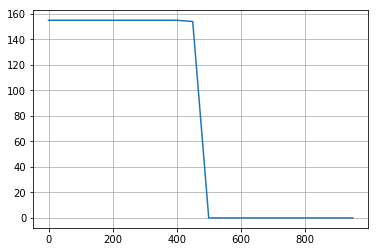

In [37]:
plt.plot(listOfmedianSequenceLengthTreshold, listOfLenCleanId)
#plt.xticks(x_pos, listOfSummarizeId)
plt.grid(True)
plt.show()

In [38]:
medianSequenceLengthTreshold = 400
listOfCleanedId = dfOfIdsSplitLibOutput[dfOfIdsSplitLibOutput["Median_sequence_length"] > medianSequenceLengthTreshold].index.tolist()
print("Length of cleaned ids : {0:d}".format(len(listOfCleanedId)))

Length of cleaned ids : 155


### Concat seqs.fna files

In [39]:
fileOfAllSeqs = os.path.join(dDataOut,nameOfAllSeqsFile)

In [40]:
# concat in pythonic way
with open(fileOfAllSeqs,'wb') as wfd:
    for Id in natsorted(listOfCleanedId):
        dirOfIdSplitLib = os.path.join(dirOfSplitLibFiles,Id)
        fileOfIdSplitLib = os.path.join(dirOfIdSplitLib,nameOfSeqsFile)
        with open(fileOfIdSplitLib,'rb') as fd:
            shutil.copyfileobj(fd, wfd)
        fd.close()
wfd.close()

### Reject unvalitate candidate

In [41]:
listOfIdToDrop = list(set(dfOfIdsSplitLibOutput.index.tolist()) - set(listOfCleanedId))
dfOfIdsSplitLibOutput = dfOfIdsSplitLibOutput.drop(listOfIdToDrop)
dfOfIdsSplitLibOutputDescribe =  dfOfIdsSplitLibOutput.describe()

In [42]:
minMinSeq = int(dfOfIdsSplitLibOutputDescribe.loc["min","Median_sequence_length"]) - 100
maxMinSeq = int(dfOfIdsSplitLibOutputDescribe.loc["min","Median_sequence_length"]) - 50               
print("Estimate minimal sequence length:\n{mn:d} < minSeqLen < {mx:d}".format(mn=minMinSeq,mx=maxMinSeq))

Estimate minimal sequence length:
349 < minSeqLen < 399


In [43]:
minSeqLen = 375

### Clean min length with seqkit

In [44]:
fileOfCleanedAllSeqs = os.path.join(dDataOut, "{NBA:s}-clean-{FO:s}".format(NBA=nameOfBatch,FO=nameOfAllSeqsFile))

In [45]:
seqkit = "/opt/anaconda3/bin/seqkit"
cat =  "/bin/cat"

In [46]:
print_output = True
run = True

In [47]:
seqkit_cmd = "{bc:s} {fi:s} | {bsk:s} seq -m {ml:d} > {fo:s}".format(
    bc=cat,
    fi=fileOfAllSeqs,
    bsk=seqkit,
    ml=minSeqLen,
    fo=fileOfCleanedAllSeqs)
if print_output:
    print(seqkit_cmd)
if run:
    process = subprocess.Popen(
        seqkit_cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out, err) = process.communicate()
    if out:
        print(out.decode("utf-8"))
    if err:
        print(err.decode("utf-8"))

/bin/cat /home/srhuet/projets/Biscal_xp2_coal/data/out/16S-all_sequences.fna | /opt/anaconda3/bin/seqkit seq -m 375 > /home/srhuet/projets/Biscal_xp2_coal/data/out/16S-clean-16S-all_sequences.fna
[WARN] you may switch on flag -g/--remove-gaps to remove spaces



## Remove large data 

In [49]:
del dfOfIdsPearOutput
del dfOfIdsSplitLibOutput
del dfOfIdsSplitLibOutputDescribe
#del listOfCleanedAllSeqsRecords
del dictOfAllSeqsRecords

NameError: name 'dfOfIdsPearOutput' is not defined

# OTU picking

In [50]:
print_output = False
run = True

## Reference dataset settings 

In [51]:
# 16S : 
fileOfDNARef = os.path.join(dGlobalDataReferences,"16S/gold.fa")
#18S
#fileOfDNARef = os.path.join(dGlobalDataSilvaQiime,"rep_set/rep_set_18S_only/97/97_otus_18S.fasta")

## Settings

In [52]:
# 16S
vsearchIdentityThreshold = "0.94"
# 18S
#vsearchIdentityThreshold = "0.94"
nameOfTheRun = "{b:s}-2019-09-26-{it:s}".format(b = nameOfBatch,it = vsearchIdentityThreshold)

In [53]:
dDataRunExt = os.path.join(os.path.join(dDataRun,nameOfTheRun),"ext")
dDataRunInt = os.path.join(os.path.join(dDataRun,nameOfTheRun),"int")
dDataRunOut = os.path.join(os.path.join(dDataRun,nameOfTheRun),"out")
if not os.path.exists(dDataRunExt):
    os.makedirs(dDataRunExt)
if not os.path.exists(dDataRunInt):
    os.makedirs(dDataRunInt)
if not os.path.exists(dDataRunOut):
    os.makedirs(dDataRunOut)

## Picking

### Set variable names

In [54]:
#Dereplicate
fileOfDerep = os.path.join(dDataRunInt,"all_seqs_derep.fna")
#Cluster
fileOfCentroids = os.path.join(dDataRunInt,"all_centroids.fna")
#Denovo Chimera Check
fileOfDenovChimeraFREE = os.path.join(dDataRunInt,"all_NODENOVOCHIMERA.fna")
fileOfDenovChimera = os.path.join(dDataRunInt,"all_DENOVOCHIMERA.fna")
#Ref-based Chimera Check
fileOfRefChimeraFREE = os.path.join(dDataRunInt,"all_NO_CHIMERA.fna")
fileOfRefChimera = os.path.join(dDataRunInt,"all_REFCHIMERA.fna")
#Sort-by-size
# file output
fileOfCleanSortedSeqs = os.path.join(dDataRunInt,"all_CleanedSorted.fna")
#Re-Cluster
fileOfCentroidsCleaned = os.path.join(dDataRunInt,"all_cleaned_centroids.fna")
#Search and assign seqs to cluster
fileOfOtuMapUC = os.path.join(dDataRunInt,"all_otu_map.uc")

### Picking the OTUs

In [55]:
# running VSEARCH
#Dereplicate
vsearch_cmd_Derep = "{bvsearch:s} --derep_fulllength {fin:s} --sizeout --output {fout:s}".format(bvsearch=vsearch,
                                                                                              fin=fileOfCleanedAllSeqs,
                                                                                              fout=fileOfDerep)
if print_output:
    print(vsearch_cmd_Derep)
if run:
    process = subprocess.Popen(vsearch_cmd_Derep, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

#Cluster
vsearch_cmd_Cluster = "{bvsearch:s} --cluster_smallmem {fin:s} --id {it:s} --usersort --threads 10 --sizein --sizeout --relabel OTU- --centroids {fout:s}".format(bvsearch=vsearch,
                                            fin=fileOfDerep,
                                            it = vsearchIdentityThreshold,
                                            fout=fileOfCentroids)
if print_output:
    print(vsearch_cmd_Cluster)
if run:
    process = subprocess.Popen(vsearch_cmd_Cluster, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

#Denovo Chimera Check
vsearch_cmd_DenovoChimera = "{bvsearch:s} --uchime_denovo {fin:s} --nonchimeras {fout1:s} --chimeras {fout2:s} --sizein --sizeout".format(bvsearch=vsearch,
                  fin=fileOfCentroids,
                  fout1=fileOfDenovChimeraFREE,
                  fout2=fileOfDenovChimera)
if print_output:
    print(vsearch_cmd_DenovoChimera)
if run:
    process = subprocess.Popen(vsearch_cmd_DenovoChimera, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

#Ref-based Chimera Check
vsearch_cmd_RefChimera = "{bvsearch:s} --uchime_ref {fin:s} --db {fin2:s} --nonchimeras {fout1:s} --chimeras {fout2:s} --sizein --sizeout".format(bvsearch=vsearch,
                           fin=fileOfDenovChimeraFREE,
                           fin2=fileOfDNARef,
                           fout1=fileOfRefChimeraFREE,
                           fout2=fileOfRefChimera)                                                                                                                                               
if print_output:
    print(vsearch_cmd_RefChimera)
if run:
    process = subprocess.Popen(vsearch_cmd_RefChimera, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

#Sort-by-size
# file output
vsearch_cmd_Sort = "{bvsearch:s} --sortbysize {fin:s} --minsize 10 --sizeout --output {fout:s}".format(bvsearch=vsearch,
                  fin=fileOfRefChimeraFREE,
                  fout=fileOfCleanSortedSeqs)
if print_output:
    print(vsearch_cmd_Sort)
if run:
    process = subprocess.Popen(vsearch_cmd_Sort, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))
    
#Re-Cluster
vsearch_cmd_Cluster = "{bvsearch:s} --cluster_smallmem {fin:s} --id {it:s} --usersort --threads 10 --centroids {fout:s} --sizein --sizeout".format(bvsearch = vsearch,
                           fin = fileOfCleanSortedSeqs,
                           it = vsearchIdentityThreshold,
                           fout = fileOfCentroidsCleaned)
if print_output:
    print(vsearch_cmd_Cluster)
if run:
    process = subprocess.Popen(vsearch_cmd_Cluster, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))
        
# Clean ID (remove ';size=\d+;' from ID) for fileOfCentroidsCleaned
sedCmd = "{bs:s} -i '/^>/ s/;.*//' {f:s}".format(bs = sed, f = fileOfCentroidsCleaned)
if print_output:
    print(sedCmd)
if run:
    process = subprocess.Popen(sedCmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

#Search and assign seqs to cluster
vsearch_cmd_Search = "{bvsearch:s} --usearch_global {fin:s} --db {fin2:s} --strand plus --id {it:s} --uc {fout:s}".format(bvsearch=vsearch,
                 fin=fileOfCleanedAllSeqs,
                 fin2=fileOfCentroidsCleaned,
                 it = vsearchIdentityThreshold,
                 fout=fileOfOtuMapUC)
if print_output:
    print(vsearch_cmd_Search)
if run:
    process = subprocess.Popen(vsearch_cmd_Search, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

vsearch v2.15.2_linux_x86_64, 125.9GB RAM, 40 cores
https://github.com/torognes/vsearch

Dereplicating file /home/srhuet/projets/Biscal_xp2_coal/data/out/16S-clean-16S-all_sequences.fna 100%
945969368 nt in 2041102 seqs, min 375, max 490, avg 463
Sorting 100%
2036002 unique sequences, avg cluster 1.0, median 1, max 3
Writing output file 100%

vsearch v2.15.2_linux_x86_64, 125.9GB RAM, 40 cores
https://github.com/torognes/vsearch

Reading file /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/all_seqs_derep.fna 100%
943609534 nt in 2036002 seqs, min 375, max 490, avg 463
Masking 100%
Counting k-mers 100%
Clustering 100%
Sorting clusters 100%
Writing clusters 100%
Clusters: 75887 Size min 1, max 203806, avg 26.8
Singletons: 41362, 2.0% of seqs, 54.5% of clusters

vsearch v2.15.2_linux_x86_64, 125.9GB RAM, 40 cores
https://github.com/torognes/vsearch

Reading file /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/all_centroids.fna 100%
34995463 nt i

## Convert otu map

In [56]:
convert_otu_map = os.path.join(dBinExt,"mesas-uc2clust.py")
#Output File
fileOfOtuMapTXT = os.path.join(dDataRunInt,"all_otumap.txt")

In [66]:
#Convert OTU map to .txt format
convertOtumap_cmd = "{bpython:s} {bconvert_otu_map:s} {fin:s} {fout:s}".format(bpython=snake,
                                                                               bconvert_otu_map=convert_otu_map,
                                                                               fin=fileOfOtuMapUC,
                                                                               fout=fileOfOtuMapTXT)
if print_output:
    print(convertOtumap_cmd)
if run:
    process = subprocess.Popen(convertOtumap_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/python2.7 /home/srhuet/projets/Biscal_xp2_coal/bin/ext/mesas-uc2clust.py /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/all_otu_map.uc /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/all_otumap.txt


## Assign taxonomy

### 16S

In [67]:
%env RDP_JAR_PATH=/opt/anaconda3/envs/python2/bin/rdp_classifier-2.2.jar

env: RDP_JAR_PATH=/opt/anaconda3/envs/python2/bin/rdp_classifier-2.2.jar


In [68]:
### cas du 16S ###
dirOfTaxoDynOutput = os.path.join(dDataRunInt,"taxo_{0:s}".format(vsearchIdentityThreshold))

In [69]:
### cas du 16S ###
assign_taxo_cmd = "{bassign_taxo:s} -m rdp -i {fin:s} -o {fout:s}".format(bassign_taxo=assign_taxo,
                                                                            fin=fileOfCentroidsCleaned,
                                                                            fout=dirOfTaxoDynOutput)
if print_output:
    print(assign_taxo_cmd)
if run:
    process = subprocess.Popen(assign_taxo_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/assign_taxonomy.py -m rdp -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/all_cleaned_centroids.fna -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/taxo_0.94


## Make otu table

In [70]:
print_output = True

In [71]:
fileOfTaxoDynOutput = os.path.join(dirOfTaxoDynOutput,"all_cleaned_centroids_tax_assignments.txt")
fileOfBiomOTUTable = os.path.join(dDataRunInt,"otu_table.biom")

In [72]:
make_otu_table_cmd = "{bmake_otu_table:s} -i {fin:s} -t {taxin:s} -o {fout:s}".format(bmake_otu_table = make_otu_table,
                                                                                      fin = fileOfOtuMapTXT,
                                                                                      taxin=fileOfTaxoDynOutput,
                                                                                      fout=fileOfBiomOTUTable)
if print_output:
    print(make_otu_table_cmd)
if run:
    process = subprocess.Popen(make_otu_table_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/make_otu_table.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/all_otumap.txt -t /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/taxo_0.94/all_cleaned_centroids_tax_assignments.txt -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/otu_table.biom


## Convert otu table to txt

In [73]:
fileOfClassicOTUTable = os.path.join(dDataRunInt,"otu_table.csv")

In [74]:
#output file
biom_convert_cmd = "{bbiom:s} convert -i {fin:s} -o {fout:s} --to-tsv --header-key taxonomy".format(bbiom=biom_convert,
                                                                                            fin=fileOfBiomOTUTable,
                                                                                            fout=fileOfClassicOTUTable)
if print_output:
    print(biom_convert_cmd)
if run:
    process = subprocess.Popen(biom_convert_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/biom convert -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/otu_table.biom -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/otu_table.csv --to-tsv --header-key taxonomy


In [75]:
dfOfClassicOTUTable = pd.read_csv(fileOfClassicOTUTable, sep = "\t",header=1)

In [76]:
dfOfClassicOTUTable.head(30)

,#OTU ID,1,3,13,18,23,24,33,36,47,...,184,185,186,187,188,189,190,191,70,taxonomy
0,OTU-2344,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Actinobacteria; c__Thermoleoph...
1,OTU-39276,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Chloroflexi; c__Ktedonobacteri...
2,OTU-55526,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__Cytophagia; ...
3,OTU-29106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Acidobacteria; c__Solibacteres...
4,OTU-3130,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Gemmatimonadetes; c__Gemm-1; o...
5,OTU-11730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Fibrobacteres; c__Fibrobacteri...
6,OTU-27085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Betaproteob...
7,OTU-5880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Chloroflexi; c__Anaerolineae; ...
8,OTU-52979,1.0,3.0,2.0,0.0,3.0,3.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
9,OTU-5775,4.0,5.0,7.0,4.0,5.0,4.0,4.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...


## Check MOCK size

In [77]:
dfOfClassicOTUTable.astype(bool).sum()

#OTU ID     3227
1            978
3           1162
13          1047
18           917
23          1040
24          1031
33           893
36           894
47          1043
50          1025
51           988
53          1085
55          1003
72           983
89           943
98           937
100         1054
101         1052
103         1089
106          997
121         1119
126         1080
130         1009
132         1688
133         1759
134         1621
135         1574
140         1903
141         1797
            ... 
118         1255
119          987
120         1081
123         1161
124         1050
125          948
129          922
44           405
52           942
56          1031
58          1185
68           842
78           892
105          950
115         1023
128         1204
180           82
181           81
182           79
183           54
184           49
185           56
186           53
187           48
188           44
189           37
190           42
191           

# Diversity indices

In [78]:
print_output = True
run = True

## Set indices

In [79]:
indices = "chao1,dominance,equitability,observed_species,shannon,simpson_reciprocal,PD_whole_tree"

## 5.0 binaries

In [80]:
multiple_rarefactions = "/opt/anaconda3/envs/python2/bin/multiple_rarefactions.py"
summarize_taxa = "/opt/anaconda3/envs/python2/bin/summarize_taxa_through_plots.py"
cmalign = "/opt/anaconda3/bin/cmalign"
esl_reformat = "/opt/anaconda3/bin/esl-reformat"
make_phylogeny = "/opt/anaconda3/envs/python2/bin/make_phylogeny.py"
alpha_diversity = "/opt/anaconda3/envs/python2/bin/alpha_diversity.py"
collate_alpha = "/opt/anaconda3/envs/python2/bin/collate_alpha.py"
make_rarefaction_plots = "/opt/anaconda3/envs/python2/bin/make_rarefaction_plots.py"
beta_diversity = "/opt/anaconda3/envs/python2/bin/beta_diversity.py"
principal_coordinates = "/opt/anaconda3/envs/python2/bin/principal_coordinates.py"
make_emperor = "/opt/anaconda3/envs/python2/bin/make_emperor.py"
biom = "/opt/anaconda3/envs/python2/bin/biom" 

In [81]:
# summarize-table
fileOfBiomSummarizeTable = os.path.join(dDataRunInt,"otu_table.summarize.txt")

In [82]:
# summarize-table
biomsum_cmd = "{bbs:s} summarize-table -i {fin:s} > {fout:s}".format(bbs=biom,
                                                                    fin=fileOfBiomOTUTable,
                                                                    fout=fileOfBiomSummarizeTable)
if print_output:
    print(biomsum_cmd)
if run:
    process = subprocess.Popen(biomsum_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/biom summarize-table -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/otu_table.biom > /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/otu_table.summarize.txt


In [83]:
pattern = re.compile(r"(?P<ID>[\w-]+):\s(?P<SIZE>[\d.]+)")
counts_sample_detail = "Counts/sample detail"
counts_sample_detailFlag = False
listOfSummarizeId = []
listOfSummarizeValue = []
with open(fileOfBiomSummarizeTable,"r") as fh:
    for line in fh.readlines():
        if not counts_sample_detailFlag:
            print(line.strip())
            if re.search(counts_sample_detail,line):
                counts_sample_detailFlag = True
        else:
            m = re.match(pattern,line.strip())
            if m:
                listOfSummarizeId.append(m.group("ID"))
                listOfSummarizeValue.append(int(float(m.group("SIZE"))))
            else:
                print("Error on |{0:s}|".format(line.strip()))

Num samples: 155
Num observations: 3227
Total count: 1743012
Table density (fraction of non-zero values): 0.306

Counts/sample summary:
Min: 31.0
Max: 28080.0
Median: 10873.000
Mean: 11245.239
Std. dev.: 3407.564
Sample Metadata Categories: None provided
Observation Metadata Categories: taxonomy

Counts/sample detail:


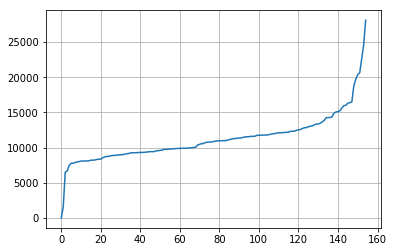

In [84]:
x_pos = np.arange(len(listOfSummarizeId))
#plt.figure(figsize=(40,20))
plt.plot(x_pos,listOfSummarizeValue)
#plt.xticks(x_pos, listOfSummarizeId)
plt.grid(True)
plt.show()

In [85]:
print_output = True
run = True

In [118]:
minimalDepth = "8000"

## Align sequences

### Set reference cm file for alignements with infernal

#### 16S

In [119]:
fileOfRefCM = os.path.join(dGlobalDataSilva132,"cm_files/SILVA_132_SSURef_Nr99_tax_silva_full_align_trunc.cm")

### Sequences alignement with infernal

In [120]:
dirOfAlignSeqs = os.path.join(dDataRunInt,"align_seqs.d")
if not os.path.exists(dirOfAlignSeqs):
    os.makedirs(dirOfAlignSeqs)

In [121]:
fileOfAlignSTO = os.path.join(dirOfAlignSeqs,"all_cleaned_centroids_aligned.sto")
n_cpu = 10

In [124]:
# align_seqs with infernal
cmalign_cmd = "{BCN:s} --cpu {CPU:d} -o {FOUT:s} {CMF:s} {FIN:s}".format(BCN = cmalign,
                                                                         CPU = n_cpu,
                                                                         FOUT = fileOfAlignSTO,
                                                                         CMF = fileOfRefCM,
                                                                         FIN = fileOfCentroidsCleaned)
if print_output:
    print(cmalign_cmd)
if run:
    process = subprocess.Popen(cmalign_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/bin/cmalign --cpu 10 -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/align_seqs.d/all_cleaned_centroids_aligned.sto /vol/databases/collections/SILVA_132_QIIME_release/cm_files/SILVA_132_SSURef_Nr99_tax_silva_full_align_trunc.cm /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/all_cleaned_centroids.fna
# cmalign :: align sequences to a CM
# INFERNAL 1.1.3 (Nov 2019)
# Copyright (C) 2019 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# CM file:                                     /vol/databases/collections/SILVA_132_QIIME_release/cm_files/SILVA_132_SSURef_Nr99_tax_silva_full_align_trunc.cm
# sequence file:                               /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/all_cleaned_centroids.fna
# CM name:                                     SILVA_132_SSURef_Nr99_tax_silva_full_a

### Reformat sequences alignements Stockholm -> fasta (asa)

In [91]:
fileOfAlignFASTA = os.path.join(dirOfAlignSeqs,"all_cleaned_centroids_aligned.fasta")
# afa format is a fasta format with alignements data, be carefull gaps are noted with dot
align_format = "afa"

In [92]:
esl_reformat_cmd = "{BET:s} -d -u --gapsym=- -o {FOUT:s} {FORMAT:s} {FIN:s}".format(BET = esl_reformat,
                                                                                    FOUT = fileOfAlignFASTA,
                                                                                    FORMAT = align_format,
                                                                                    FIN = fileOfAlignSTO)
if print_output:
    print(esl_reformat_cmd)
if run:
    process = subprocess.Popen(esl_reformat_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))                                                                                    

/opt/anaconda3/bin/esl-reformat -d -u --gapsym=- -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/align_seqs.d/all_cleaned_centroids_aligned.fasta afa /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/align_seqs.d/all_cleaned_centroids_aligned.sto


## Make phylogeny

In [93]:
# make_phylogeny
fileOfMakePhylogeny = os.path.join(dDataRunOut,"phylogeny.tre")

In [94]:
# make_phylogeny
makephylo_cmd = "{bmp:s} -i {fin:s} -o {fout:s}".format(bmp=make_phylogeny,
                                                        fin=fileOfAlignFASTA,
                                                        fout=fileOfMakePhylogeny)
if print_output:
    print(makephylo_cmd)
if run:
    process = subprocess.Popen(makephylo_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/make_phylogeny.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/align_seqs.d/all_cleaned_centroids_aligned.fasta -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/phylogeny.tre


## Multiple rarefaction

In [95]:
dirOfMultipleRarefactions = os.path.join(dDataRunOut,"multiple_rarefactions.d")

In [125]:
# multiple_rarefaction
mrarefactions_cmd = "{bmr:s} -i {fin:s} -m 1000 -x {depth:s} -s 500 --lineages_included -o {fout:s}".format(bmr=multiple_rarefactions,
                 fin=fileOfBiomOTUTable,
                 depth=minimalDepth,
                 fout=dirOfMultipleRarefactions)
if print_output:
    print(mrarefactions_cmd)
if run:
    process = subprocess.Popen(mrarefactions_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/multiple_rarefactions.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/int/otu_table.biom -m 1000 -x 8000 -s 500 --lineages_included -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/multiple_rarefactions.d


## Alpha diversity

In [126]:
# Alpha diversity
dirOfAlphaDiversity = os.path.join(dDataRunOut,"alpha_diversity.d")

In [127]:
# Alpha diversity
alphadiv_cmd = "{bad:s} -i {fin:s} -m {ind:s} -t {tre:s} -o {fout:s}".format(bad=alpha_diversity,
                                                                  fin=dirOfMultipleRarefactions,
                                                                  ind=indices,
                                                                  tre=fileOfMakePhylogeny,           
                                                                  fout=dirOfAlphaDiversity)
if print_output:
    print(alphadiv_cmd)
if run:
    process = subprocess.Popen(alphadiv_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/alpha_diversity.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/multiple_rarefactions.d -m chao1,dominance,equitability,observed_species,shannon,simpson_reciprocal,PD_whole_tree -t /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/phylogeny.tre -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/alpha_diversity.d


## Collate alpha

In [128]:
#collate_alpha
dirOfCollateAlpha = os.path.join(dDataRunOut,"collate_alpha.d")

In [129]:
#collate_alpha
collatealpha_cmd = "{bca:s} -i {fin:s} -o {fout:s}".format(bca=collate_alpha,
                                                                  fin=dirOfAlphaDiversity,
                                                                  fout=dirOfCollateAlpha)
if print_output:
    print(collatealpha_cmd)
if run:
    process = subprocess.Popen(collatealpha_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/collate_alpha.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/alpha_diversity.d -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/collate_alpha.d


## Make rarefaction plots

In [130]:
print_output = True
run = True

### Load mapping file

In [131]:
fileOfMappingIdXP = os.path.join(dDataExt,"Mapping_file_xp2_coal.txt")
nameOfMappingFile = os.path.splitext(os.path.basename(fileOfMappingIdXP.replace(" ","")))[0]

### Make the Alpha Plots

In [132]:
dirOfMakeRarefactionPlot = os.path.join(dDataRunOut,"{mf:s}/alpha_plot".format(mf=nameOfMappingFile))

In [133]:
# make_rarefaction_plot
mrareplot_cmd = "{bmrp:s} -i {fin:s} -m {mapp:s} -o {fout:s}".format(bmrp=make_rarefaction_plots,
                                                                    fin=dirOfCollateAlpha,
                                                                    mapp=fileOfMappingIdXP,
                                                                    fout=dirOfMakeRarefactionPlot)
if print_output:
    print(mrareplot_cmd)
if run:
    process = subprocess.Popen(mrareplot_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/make_rarefaction_plots.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/collate_alpha.d -m /home/srhuet/projets/Biscal_xp2_coal/data/ext/Mapping_file_xp2_coal.txt -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/alpha_plot


### The alpha plots link

In [134]:
rarefactionPlotsLinks = "<a href=\"../data/run/{run:s}/out/{mf:s}/alpha_plot/rarefaction_plots.html\" target=\"_blank\">Link to Alpha Plots</a>".format(run=nameOfTheRun,mf=nameOfMappingFile)
display(Markdown(rarefactionPlotsLinks))

<a href="../data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/alpha_plot/rarefaction_plots.html" target="_blank">Link to Alpha Plots</a>

## Beta diversity (unifrac, bray-curtis)

### Set list of metrics

In [135]:
listOfMetrics = ["unweighted_unifrac","weighted_unifrac","bray_curtis"]

In [136]:
metrics = ",".join(listOfMetrics)

### Compute Beta diversity (16S)

In [137]:
# beta_diversity (unifrag, bray-curtis)
fileOfRarefactionBiomTable=os.path.join(dirOfMultipleRarefactions,"rarefaction_{md:s}_0.biom".format(md=minimalDepth))

In [138]:
# beta_diversity (unifrag, bray-curtis)
dirOfBetaDiversity = os.path.join(dDataRunOut,"{mf:s}/beta_diversity.d".format(mf=nameOfMappingFile))
betadiv_cmd = "{bbd:s} -i {fin:s} -m {met:s} -t {tre:s} -o {fout:s}".format(bbd=beta_diversity,
                                                                    fin=fileOfRarefactionBiomTable,
                                                                    met=metrics,
                                                                    tre=fileOfMakePhylogeny,
                                                                    fout=dirOfBetaDiversity)
if print_output:
    print(betadiv_cmd)
if run:
    process = subprocess.Popen(betadiv_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()     
    if out:         
        print(out.decode("utf-8"))     
    if err:         
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/beta_diversity.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/multiple_rarefactions.d/rarefaction_8000_0.biom -m unweighted_unifrac,weighted_unifrac,bray_curtis -t /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/phylogeny.tre -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/beta_diversity.d
/opt/anaconda3/envs/python2/lib/python2.7/site-packages/cogent/maths/distance_transform.py:188: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if rank(datamtx) != 2:



## Principal coordinates

In [139]:
dirOfPrincipaleCoordinates = os.path.join(dDataRunOut,"{mf:s}/principale_coordinates.d".format(mf=nameOfMappingFile))

In [140]:
princoor_cmd = "{bpc:s} -i {fin:s} -o {fout:s}".format(bpc=principal_coordinates,
                                                        fin=dirOfBetaDiversity,
                                                        fout=dirOfPrincipaleCoordinates)
if print_output:
    print(princoor_cmd)
if run:
    process = subprocess.Popen(princoor_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()
    if out:
        print(out.decode("utf-8"))
    if err:
        print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/principal_coordinates.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/beta_diversity.d -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/principale_coordinates.d
/opt/anaconda3/envs/python2/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:107: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0240228708865 and the largest is 2.34320426361.
  RuntimeWarning
/opt/anaconda3/envs/python2/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:107: RuntimeWarning: The result contains negative eigenval

## Make emperor

In [141]:
dirOfMakeEmperor = os.path.join(dDataRunOut,"{mf:s}/make_emperor.d".format(mf=nameOfMappingFile))
if not os.path.exists(dirOfMakeEmperor):
    os.makedirs(dirOfMakeEmperor)

In [142]:
#  make_emperor
for metric in listOfMetrics:
    fileOfPrincipaleCoordinatesMetrics = os.path.join(dirOfPrincipaleCoordinates,"pcoa_{m:s}_rarefaction_{md:s}_0.txt".format(m=metric,md=minimalDepth))
    dirOfMakeEmperor = os.path.join(dDataRunOut,"{mf:s}/make_emperor.d/{m:s}/".format(m = metric,
                                                                                      mf = nameOfMappingFile))
    makeemp_cmd = "{bme:s} -i {fin:s} -m {mapp:s} -o {fout:s} --ignore_missing_samples".format(bme= make_emperor,
                                                                      fin=fileOfPrincipaleCoordinatesMetrics,
                                                                      mapp = fileOfMappingIdXP,
                                                                      fout=dirOfMakeEmperor)
    if print_output:
        print(makeemp_cmd)
    if run:
        process = subprocess.Popen(makeemp_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        (out,err) = process.communicate()
        if out:
            print(out.decode("utf-8"))
        if err:
            print(err.decode("utf-8"))

/opt/anaconda3/envs/python2/bin/make_emperor.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/principale_coordinates.d/pcoa_unweighted_unifrac_rarefaction_8000_0.txt -m /home/srhuet/projets/Biscal_xp2_coal/data/ext/Mapping_file_xp2_coal.txt -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/make_emperor.d/unweighted_unifrac/ --ignore_missing_samples
/opt/anaconda3/envs/python2/bin/make_emperor.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/principale_coordinates.d/pcoa_weighted_unifrac_rarefaction_8000_0.txt -m /home/srhuet/projets/Biscal_xp2_coal/data/ext/Mapping_file_xp2_coal.txt -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/make_emperor.d/weighted_unifrac/ --ignore_missing_samples
/opt/anaconda3/envs/python2/bin/make_emperor.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.

In [143]:
emperorUnweightedPlotsLinks = "<a href=\"../data/run/{run:s}/out/{mf:s}/make_emperor.d/unweighted_unifrac/index.html\" target=\"_blank\">Link to Unweighted Plots</a>".format(run=nameOfTheRun,
                                                  mf = nameOfMappingFile)
emperorWeightedPlotsLinks = "<a href=\"../data/run/{run:s}/out/{mf:s}/make_emperor.d/weighted_unifrac/index.html\" target=\"_blank\">Link to weighted Plots</a>".format(run=nameOfTheRun,
                                                     mf = nameOfMappingFile)
emperorBrayCurtisPlotsLinks = "<a href=\"../data/run/{run:s}/out/{mf:s}/make_emperor.d/bray_curtis/index.html\" target=\"_blank\">Link to bray-curtis Plots</a>".format(run=nameOfTheRun,
                                                        mf = nameOfMappingFile)
display(Markdown(emperorUnweightedPlotsLinks))
display(Markdown(emperorWeightedPlotsLinks))
display(Markdown(emperorBrayCurtisPlotsLinks))

<a href="../data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/make_emperor.d/unweighted_unifrac/index.html" target="_blank">Link to Unweighted Plots</a>

<a href="../data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/make_emperor.d/weighted_unifrac/index.html" target="_blank">Link to weighted Plots</a>

<a href="../data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/make_emperor.d/bray_curtis/index.html" target="_blank">Link to bray-curtis Plots</a>

## Summarize taxa throught plots


In [144]:
dirOfSummTaxa = os.path.join(dDataRunOut,"{mf:s}/summarize_taxa.d".format(mf=nameOfMappingFile))

In [145]:
summarize_taxa_cmd = "{bst:s} -i {fin:s} -o {fout:s}".format(bst=summarize_taxa,
                                                        fin=fileOfRarefactionBiomTable,
                                                        fout=dirOfSummTaxa)
if print_output:
    print(summarize_taxa_cmd)
if run:
    process = subprocess.Popen(summarize_taxa_cmd, shell = True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out,err) = process.communicate()
    if out:
        print(out.decode("utf-8"))
    if err:
        print(err.decode("utf-8")) 

/opt/anaconda3/envs/python2/bin/summarize_taxa_through_plots.py -i /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/multiple_rarefactions.d/rarefaction_8000_0.biom -o /home/srhuet/projets/Biscal_xp2_coal/data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/summarize_taxa.d
Error in summarize_taxa_through_plots.py: Output directory already exists. Please choose a different directory, or force overwrite with -f.

If you need help with QIIME, see:
http://help.qiime.org



In [146]:
summaryPlotsLinks = "<a href=\"../data/run/{run:s}/out/{mf:s}/summarize_taxa.d/taxa_summary_plots/bar_charts.html\" target=\"_blank\">Link to Summary Plots</a>".format(run = nameOfTheRun,
                                                    mf = nameOfMappingFile)
display(Markdown(summaryPlotsLinks))

<a href="../data/run/16S-2019-09-26-0.94/out/Mapping_file_xp2_coal/summarize_taxa.d/taxa_summary_plots/bar_charts.html" target="_blank">Link to Summary Plots</a>